<a href="https://colab.research.google.com/github/hifsakazmi/ai-in-python/blob/main/deeplearning_obesity_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimation of Obesity Levels using Neural Network


## Project Details

The goal of this project is to estimate the obesity level of individuals using a neural network.

## Data Description

This dataset includes data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 2111 records and has the following features:

* **Gender** - Male/Female
* **Age** - in years
* **Height** - in meters
* **Weight** - in kgs
* **family_history_with_overweight** - yes/no, indicates whether there is family history of overweight.
* **FAVC** - yes/no, frequent consumption of high-calorie food.
* **FCVC** - Frequency of vegetable consumption.
* **NCP** - Number of main meals in a day.
* **CAEC** - Indicates whether the individual eats any food between means. Possible values: Always, Frequently, Sometimes, no
* **SMOKE** -yes/no, smoking habit.
* **CH2O** - Daily water intake.
* **SCC** - yes/no, indicates whether the individual monitors daily caloric intake.
* **FAF** - Frequency of physical activity.
* **TUE** - Time using technological devices such as cell phone, videogames, television, computer and others.
* **CALC** - Alcohol consumption. Possible values: Always, Frequently, Sometimes, no
* **MTRANS** - Means of transport used by the individual
* **NObeyesdad** - Target, Obesity Level


## Data Exploration and Processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Description


In [ ]:
# Importing libraries required for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

### Importing data

In [ ]:
data = '/content/drive/MyDrive/Colab Notebooks/datasets/ObesityDataSet.csv'

df = pd.read_csv(data)

### Preview the dataset

In [ ]:
df.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


### View dimensions of the dataframe

In [ ]:
df.shape

(2111, 17)

### Datatypes of columns

In [ ]:
df.dtypes

,0
Gender,object
Age,float64
Height,float64
Weight,float64
family_history_with_overweight,object
FAVC,object
FCVC,float64
NCP,float64
CAEC,object
SMOKE,object


### Feature Types

From the data preview, we can identify continuous and categorical features.

#### Continuous Features
* Age
* Height
* Weight
* FCVC
* NCP
* CH2O
* FAF
* TUE

#### Categorical Features
* Gender
* family_history_with_overweight
* FAVC
* CAEC
* SMOKE
* SCC
* CALC
* MTRANS


#### Target Variable
**NObeyesdad** is target variable. For every record, it has one of the seven possible values making this a classification problem.

### Missing value detection

In [ ]:
#Counting missing values in all columns
df.isna().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


### Statistical Summary

#### Statistical summary of numeric variables

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


#### Statistical summary of categorical variables

In [ ]:
df.describe(include='object')

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,2,2,4,2,2,4,5,7
top,Male,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1726,1866,1765,2067,2015,1401,1580,351


## Graphical Analysis

### Distribution of Obesity Levels

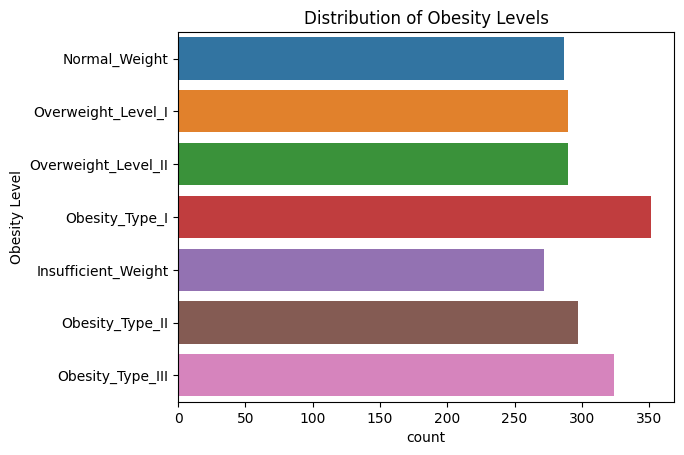

In [ ]:
sns.countplot(
    data=df,
    y='NObeyesdad',
    hue='NObeyesdad',
    dodge=False
)

plt.title("Distribution of Obesity Levels")
plt.ylabel('Obesity Level')
#plt.tick_params(axis='x', rotation=55)
plt.show()

### Age vs Obesity Level

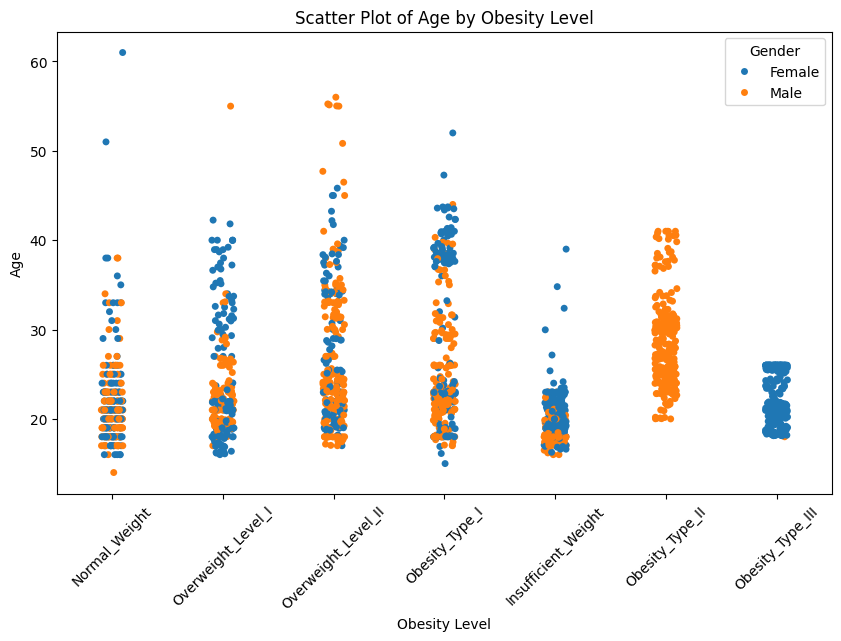

In [ ]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df,
    x='NObeyesdad',
    y='Age',
    hue='Gender',
    jitter=True)
plt.title("Scatter Plot of Age by Obesity Level")
plt.xlabel("Obesity Level")
plt.ylabel("Age")
plt.xticks(rotation=45)
plt.show()

### TODO: Explore the relationship between physical activity frequency and obesity.

### TODO: Examine the impact of different types of food consumption on obesity levels.

### Gender vs Obesity Levels


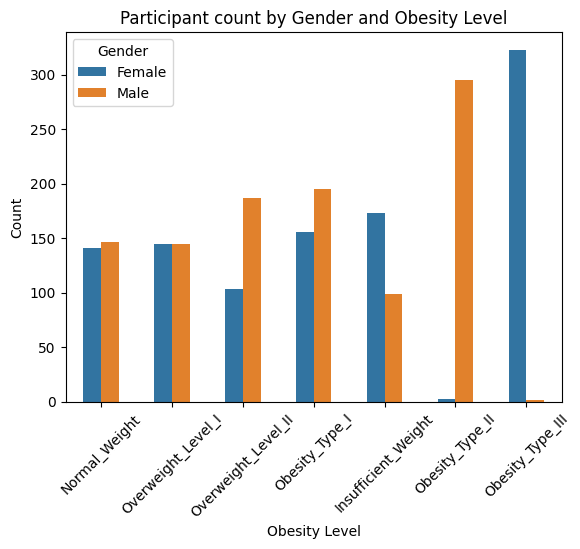

In [ ]:
sns.countplot(
    data=df,
    x='NObeyesdad',
    hue='Gender',
    width=0.5
)

# Customize the plot
plt.title('Participant count by Gender and Obesity Level')
plt.xlabel('Obesity Level')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

## Declare feature vector and target variable

In [ ]:
X = df.drop(['NObeyesdad'], axis=1)

y = df['NObeyesdad']

## Split data into separate training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [ ]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1688, 16), (423, 16))

## Feature Engineering

### Encode yes/no columns

In [ ]:
yes_no_cols = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

#preview yes/no columns in X_train
X_train[yes_no_cols].head(5)

,family_history_with_overweight,FAVC,SMOKE,SCC
1295,yes,yes,no,no
1627,yes,yes,no,no
1388,yes,yes,no,no
1318,yes,yes,no,no
648,yes,yes,no,no


In [ ]:
#function to map yes/no in columns to 1/0
def encode_yes_no(data, columns):
  for col in columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})
  return data

In [ ]:
# Encode yes/no columns in train and test sets
X_train = encode_yes_no(X_train, yes_no_cols)
X_test = encode_yes_no(X_test, yes_no_cols)

In [ ]:
# preview X_train after encoding yes/no
X_train.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
1295,Female,38.148845,1.557808,79.661693,1,1,2.000000,3.000000,Sometimes,0,1.274774,0,0.000000,0.000000,Sometimes,Automobile
1627,Male,40.366238,1.722396,109.349025,1,1,2.281963,3.770379,Sometimes,0,1.000000,0,1.330519,0.000000,no,Automobile
1388,Female,39.648946,1.572791,80.086524,1,1,2.071622,2.977909,Sometimes,0,1.468297,0,0.000000,0.000000,no,Automobile
1318,Male,23.237302,1.761008,97.829344,1,1,2.000000,3.000000,Sometimes,0,2.988771,0,2.429923,1.978043,no,Public_Transportation
648,Female,22.547298,1.722461,51.881263,1,1,2.663421,3.000000,Frequently,0,1.041110,0,0.794402,1.391948,no,Public_Transportation


In [ ]:
# check shape of X_train and X_test after encoding
X_train.shape, X_test.shape

((1688, 16), (423, 16))

### Encoding categorical columns

In [ ]:
categorical_cols = ['Gender', 'CAEC', 'CALC', 'MTRANS']

In [ ]:
# preview categorical variables in X_train
X_train[categorical_cols].head()

,Gender,CAEC,CALC,MTRANS
1295,Female,Sometimes,Sometimes,Automobile
1627,Male,Sometimes,no,Automobile
1388,Female,Sometimes,no,Automobile
1318,Male,Sometimes,no,Public_Transportation
648,Female,Frequently,no,Public_Transportation


In [ ]:
pip install category_encoders

In [ ]:
# import category encoders
import category_encoders as ce

In [ ]:
# encode categorical variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=categorical_cols)

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head(5)

,Gender_1,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC_1,...,TUE,CALC_1,CALC_2,CALC_3,CALC_4,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5
1295,1,0,38.148845,1.557808,79.661693,1,1,2.000000,3.000000,1,...,0.000000,1,0,0,0,1,0,0,0,0
1627,0,1,40.366238,1.722396,109.349025,1,1,2.281963,3.770379,1,...,0.000000,0,1,0,0,1,0,0,0,0
1388,1,0,39.648946,1.572791,80.086524,1,1,2.071622,2.977909,1,...,0.000000,0,1,0,0,1,0,0,0,0
1318,0,1,23.237302,1.761008,97.829344,1,1,2.000000,3.000000,1,...,1.978043,0,1,0,0,0,1,0,0,0
648,1,0,22.547298,1.722461,51.881263,1,1,2.663421,3.000000,0,...,1.391948,0,1,0,0,0,1,0,0,0


### Scaling numeric columns

In [ ]:
numeric_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE' ]
cols = X_train.columns

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [ ]:
X_train.head(5)

,Gender_1,Gender_2,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC_1,...,TUE,CALC_1,CALC_2,CALC_3,CALC_4,MTRANS_1,MTRANS_2,MTRANS_3,MTRANS_4,MTRANS_5
1295,1,0,2.184846,-1.557814,-0.281859,1,1,-0.777372,0.401761,1,...,-1.089561,1,0,0,0,1,0,0,0,0
1627,0,1,2.535554,0.194567,0.856293,1,1,-0.248314,1.386978,1,...,-1.089561,0,1,0,0,1,0,0,0,0
1388,1,0,2.422106,-1.398289,-0.265572,1,1,-0.642985,0.373509,1,...,-1.089561,0,1,0,0,1,0,0,0,0
1318,0,1,-0.173598,0.605672,0.414652,1,1,-0.777372,0.401761,1,...,2.178027,0,1,0,0,0,1,0,0,0
648,1,0,-0.282730,0.195259,-1.346904,1,1,0.467431,0.401761,0,...,1.209840,0,1,0,0,0,1,0,0,0


### Encode Target Variable

In [ ]:
y_train.value_counts()

,count
NObeyesdad,
Obesity_Type_I,284
Obesity_Type_III,255
Obesity_Type_II,244
Overweight_Level_II,235
Overweight_Level_I,233
Normal_Weight,230
Insufficient_Weight,207


In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Initialize the encoder
label_encoder = LabelEncoder()

# Convert to one-hot encoded vectors
y_train_encoded = to_categorical(label_encoder.fit_transform(y_train))
y_test_encoded = to_categorical(label_encoder.transform(y_test))

# Check the shape of the encoded arrays
print(y_train_encoded.shape, y_test_encoded.shape)

(1688, 7) (423, 7)


## Neural Network for Classification

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

mlp_model = models.Sequential(name="MLP_model")
mlp_model.add(layers.Dense(512, input_dim=X_train.shape[1], activation='relu'))
mlp_model.add(layers.Dense(256, activation='relu'))
mlp_model.add(layers.Dense(128, activation='relu'))
mlp_model.add(layers.Dense(7, activation='softmax'))

optimizer = Adam(learning_rate=0.001)  # Use Adam optimizer
mlp_model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

mlp_model.summary()

Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                     │ (None, 512)                 │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 179,463 (701.03 KB)

 Trainable params: 179,463 (701.03 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train_encoded shape:", y_train_encoded.shape)
print("X_test shape:", X_test.shape)
print("y_test_encoded shape:", y_test_encoded.shape)

X_train shape: (1688, 27)
y_train_encoded shape: (1688, 7)
X_test shape: (423, 27)
y_test_encoded shape: (423, 7)


In [ ]:
mlp_history = mlp_model.fit(X_train, y_train_encoded, epochs=50, batch_size=32)

Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4915 - loss: 1.4146
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8671 - loss: 0.3976
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9460 - loss: 0.2020
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9603 - loss: 0.1208
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9737 - loss: 0.0962
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9881 - loss: 0.0577
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9923 - loss: 0.0364
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9935 - loss: 0.0307
Epoch 9/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9855 - loss: 0.0469
Epoch 10/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9964 - loss: 0.0278
Epoch 11/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9753 - loss: 0.0650
Epoch 12/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9

### Evaluate the model

In [ ]:
mlp_model.evaluate(X_test, y_test_encoded)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9580 - loss: 0.1379  


[0.13193479180335999, 0.9598108530044556]

In [ ]:
predictions = mlp_model.predict(X_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
predictions

array([[0.0000000e+00, 0.0000000e+00, 1.0036125e-09, ..., 1.2200685e-09,
        5.0592101e-33, 5.5842090e-17],
       [5.4559732e-35, 9.0333102e-27, 9.9999350e-01, ..., 2.8197353e-06,
        1.2755858e-15, 4.8746705e-07],
       [2.4001492e-15, 3.0480118e-07, 2.3917045e-07, ..., 8.0336224e-12,
        9.8055410e-01, 1.9445278e-02],
       ...,
       [0.0000000e+00, 0.0000000e+00, 1.3391467e-09, ..., 9.9999928e-01,
        3.0524365e-36, 1.1530118e-18],
       [0.0000000e+00, 0.0000000e+00, 1.0103976e-05, ..., 2.2059717e-06,
        1.9635586e-29, 4.4998825e-13],
       [0.0000000e+00, 0.0000000e+00, 4.5292913e-06, ..., 1.6622344e-05,
        1.2392395e-31, 6.8994925e-15]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
y_pred_labels = label_encoder.inverse_transform(predicted_classes)


In [ ]:
y_test_labels = label_encoder.inverse_transform(np.argmax(y_test_encoded, axis=1))

### Classification report

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test_labels, y_pred_labels)
print(report)

                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.98      0.96        65
      Normal_Weight       0.96      0.88      0.92        57
     Obesity_Type_I       0.94      1.00      0.97        67
    Obesity_Type_II       1.00      1.00      1.00        53
   Obesity_Type_III       1.00      1.00      1.00        69
 Overweight_Level_I       0.92      0.95      0.93        57
Overweight_Level_II       0.96      0.89      0.92        55

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423

